# Salary Prediction of Adults in US with ML

#### Problem 

* #####  Prediction task to detemine wheaher a person makes above or below 50k

In [1]:
#load EDA/visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the modules for ml 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
#modules for evaluatiing the metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [4]:
#LIBRARY for interpreting the model
import eli5

##### Attributes

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [5]:
column_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
               'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [6]:
#load dataset
df = pd.read_csv('adult.data',names=column_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(32561, 15)

In [8]:
df = df.drop_duplicates()
df.shape

(32537, 15)

In [9]:
#data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [10]:
#find columns that are not integers but objects
df.dtypes[df.dtypes == 'object']

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
salary            object
dtype: object

## Data Cleaning

In [11]:
#Removing question marks(?) from all rows in the dataframe
df = (df.replace(' ?', np.nan))

In [12]:
#check all nan values
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

###### Replace all nan values with their mode

In [13]:
for column in df[['workclass','occupation','native-country']]:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [14]:
#summary statistics
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


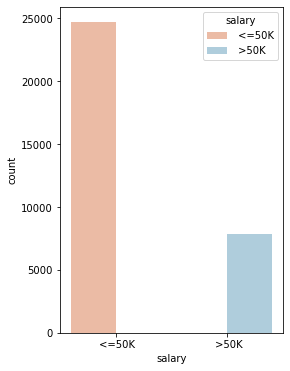

In [15]:
plt.figure(figsize=(4,6))
sns.countplot(x='salary',hue='salary',data=df,palette='RdBu')
plt.show()

* narration:  The class label in this dataset is implaced. we have more label/data for adults that earn less than 50,000 dollars.This could affect our model and as such auc_roc_score will be used to evaluate each model. 

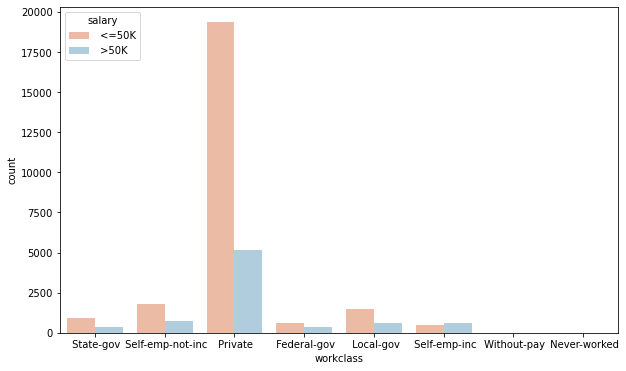

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='workclass',hue='salary',data=df,palette='RdBu')
plt.show()

* narration : Most adults in this dataset work in the private sector and earn less than 50,000 dollars

In [17]:
#save cleaned file as a csv
df.to_csv('cleaned_salary_prediction_data.csv')

###### Apply labelencoder

In [18]:
def encoder(dataframe):
    #instantiating the label encoder
    le = LabelEncoder()
    
    #returns the index of columns that have objects as values
    columns = dataframe.dtypes[dataframe.dtypes == 'object'].index
    
    #applying labelencoder to the obbject columns
    df_encoded = dataframe[columns].apply(le.fit_transform)
    
    #returns the index of columns that have int64 as values
    columns_numeric = dataframe.dtypes[dataframe.dtypes == 'int64'].index
    
    #concating the dataframe with numeric value and the label encoded dataframe
    df2 = pd.concat((df[columns_numeric],df_encoded),axis=1)
    
    return (df2)

In [19]:
df2 = encoder(df)
df2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4,0


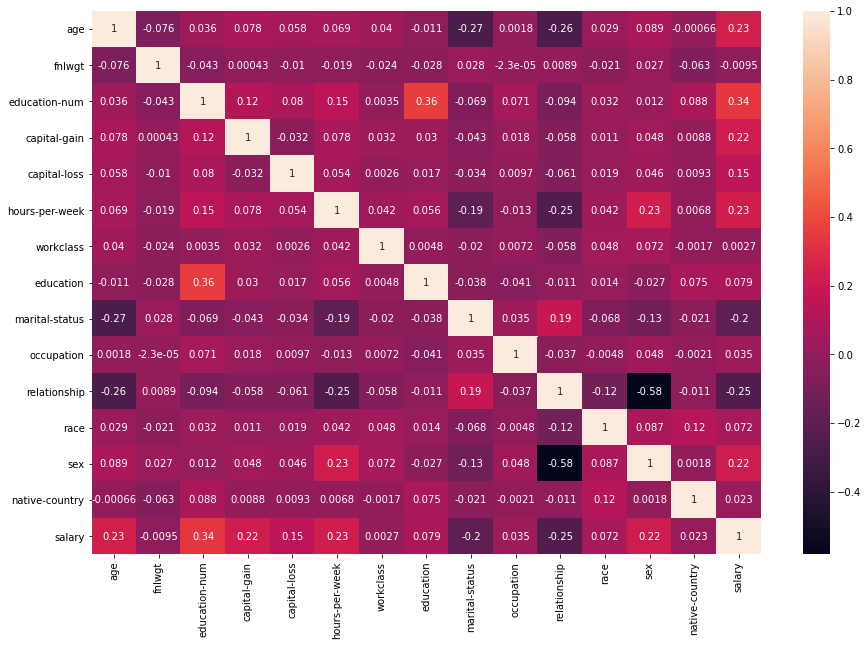

In [20]:
#visualizing the correlation with correlation-matrix/heatmap
plt.figure(figsize=(15,10))
corr_mat = df2.corr()
sns.heatmap(corr_mat,annot = True)
#displaying the plot
plt.show()

###### splitting data into testing and training data

In [21]:
X = df2.iloc[:,0:14].values
y = df2.iloc[:,14].values

## Make pipeline

###### Logistic Regression

In [22]:
#Split dataset using train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 42,stratify=y)

In [23]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
# Setup the pipeline steps: steps
steps_lr = [('scaler', StandardScaler()),
         ('lr', LogisticRegression())]


# Create the pipeline: pipeline
pipeline_lr = Pipeline(steps_lr)

# Fit the pipeline to the training set: knn_scaled
pipeline_lr.fit(X_train,y_train)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_proba_lr = pipeline_lr.predict_proba(X_test)[:,1]

# Compute and print metrics
print('Accuracy score of logistic regression model: {:.2f}%'.format(accuracy_score(y_test,y_pred_lr)*100))
print('roc_auc_score of logistic regression: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_lr)*100))

Accuracy score of logistic regression model: 82.66%
roc_auc_score of logistic regression: 85.77%


###### Interpreting the model with ELI5

In [25]:
class_names = ['<=50','>50']

In [26]:
feature_names = df.columns[:14]
feature_names = list(feature_names)
feature_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [27]:
#to clearly define class feature names
show_weight_lr = eli5.show_weights(pipeline_lr,feature_names = feature_names,target_names = class_names)
show_weight_lr

Weight?,Feature
+2.153,education
+0.845,fnlwgt
+0.469,age
+0.438,hours-per-week
+0.374,marital-status
+0.276,education-num
+0.112,capital-loss
+0.059,relationship
+0.058,workclass
+0.005,native-country


* Narration

This most important features in this model (LogisticRegression) are education,fnlwgt,age.hours-per-weight,marital-status,education-num.This features contribute mostly to the prictions made by LogisticRegression Model.

In [28]:
#Generating the confusion matrix
lr_matrix = confusion_matrix(y_test, y_pred_lr)
lr_matrix

array([[6993,  417],
       [1276, 1076]], dtype=int64)

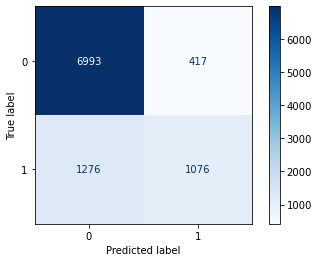

In [29]:
dist_lr = plot_confusion_matrix(pipeline_lr.fit(X_train,y_train),
                                X_test,y_test,
                                cmap='Blues')

* ###### Narration

The confusion matrics plot displayed four values which are:

True postive value,  False postive value,  True negative value  and  False negative value

- The true negative value is 6993 in class 0. This means the model was able to corrrectly predict that 6993 adults from the data set earns less than 50,000 dollars.
- The false positive value(Type II error) shows that model predicted that 417 adults earn more than 50,000 dollars but in reality they actually earn less than 50,000 dollars.
- The True postive value is 1076. This shows that 1076 adult were correctly predicted to earn more than 50,000.
- The false negative value (Type I error) shows that the model predicted that 1276 adults earn less than 50,000 dollars but in reality they earn
above 50,000 dollars and belong to class 1.


In [30]:
cv_scores_lr = cross_val_score(pipeline_lr,X,y,cv=10,scoring = 'roc_auc')
print('LogisticRegression cross validation mean score: {:.2f}%'.format(cv_scores_lr.mean()*100))

LogisticRegression cross validation mean score: 85.44%


In [31]:
#confusion matrix report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7410
           1       0.72      0.46      0.56      2352

    accuracy                           0.83      9762
   macro avg       0.78      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



###### using KNNeighbor

In [32]:
# Setup the pipeline steps: steps
steps_knn = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]


# Create the pipeline: pipeline
pipeline_knn = Pipeline(steps_knn)

# Fit the pipeline to the training set: knn_scaled
pipeline_knn.fit(X_train,y_train)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_proba_knn = pipeline_knn.predict_proba(X_test)[:,1]

# Compute and print metrics
print('Accuracy score of logistic regression model: {:.2f}%'.format(accuracy_score(y_test,y_pred_knn)*100))
print('roc_auc_score of logistic regression: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_knn)*100))

Accuracy score of logistic regression model: 83.26%
roc_auc_score of logistic regression: 85.55%


### MODEL COMPLEXITY CURVE for KNN

In [33]:
#setting up arrays to store training and testing data
neighbors = np.arange(1,9)
#array for the training accuracy
train_accuracy = np.empty(len(neighbors))
#test accuracy array
test_accuracy = np.empty(len(neighbors))

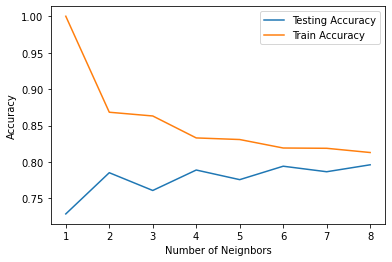

In [34]:
#loop over different values of k
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k) #setting up a K-NN classifier with k neigbors:knn
    knn.fit(X_train,y_train)     #fitting classifier to training set
    train_accuracy[i] = knn.score(X_train, y_train) ##computing accuracy on training set
    test_accuracy[i]=knn.score(X_test,y_test) #computing accuracy of testing set

#Generating a plot
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neignbors')
plt.ylabel('Accuracy')
plt.show()

###### * n_neigbors of 8 gave us the highest accuracy of closest to 80% in comparison to others

In [35]:
#to clearly define class feature names based on feature importance of the KNN classifier
show_weight_knn = eli5.show_weights(pipeline_knn,feature_names = feature_names,target_names = class_names)
show_weight_knn

In [36]:
#Generating the confusion matrix for KNN classifier
knn_matrix = confusion_matrix(y_test, y_pred_knn)
knn_matrix

array([[6719,  691],
       [ 943, 1409]], dtype=int64)

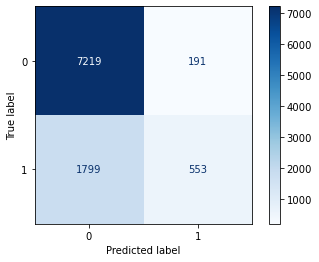

In [37]:
#plotting confusion metrics of the KNN classifier
dist_knn = plot_confusion_matrix(KNeighborsClassifier(n_neighbors=8).fit(X_train,y_train),
                                X_test,y_test,
                                cmap='Blues')

In [38]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7410
           1       0.67      0.60      0.63      2352

    accuracy                           0.83      9762
   macro avg       0.77      0.75      0.76      9762
weighted avg       0.83      0.83      0.83      9762



###### Decison Tree

In [39]:
# Setup the pipeline steps: steps
steps_dt = [('scaler', StandardScaler()),
         ('dt', DecisionTreeClassifier(max_depth= 10,min_samples_leaf=5,random_state = 42))]


# Create the pipeline: pipeline
pipeline_dt = Pipeline(steps_dt)

# Fit the pipeline to the training set: knn_scaled
pipeline_dt.fit(X_train,y_train)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_proba_dt = pipeline_dt.predict_proba(X_test)[:,1]

# Compute and print metrics
print('Accuracy score of logistic regression model: {:.2f}%'.format(accuracy_score(y_test,y_pred_dt)*100))
print('roc_auc_score of logistic regression: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_dt)*100))

Accuracy score of logistic regression model: 85.55%
roc_auc_score of logistic regression: 90.18%


#### Creating pipeline for bagging classifier

In [40]:
# Setup the pipeline steps: steps
steps_BC = [('scaler', StandardScaler()),
         ('BC',BaggingClassifier(DecisionTreeClassifier(max_depth= 10,min_samples_leaf=5,random_state = 42)))]


# Create the pipeline: pipeline
pipeline_BC = Pipeline(steps_BC)

# Fit the pipeline to the training set: knn_scaled
pipeline_BC.fit(X_train,y_train)
y_pred_BC = pipeline_BC.predict(X_test)
y_pred_proba_BC = pipeline_BC.predict_proba(X_test)[:,1]

# Compute and print metrics
print('Accuracy score of logistic regression model: {:.2f}%'.format(accuracy_score(y_test,y_pred_BC)*100))
print('roc_auc_score of logistic regression: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_BC)*100))

Accuracy score of logistic regression model: 86.43%
roc_auc_score of logistic regression: 91.61%


##### Applying BAGGING: BootStrap Aggregation

* Bagging uses a technique known as bootstrap
* it can be used to reduce variance of individual models in an ensemble

* ###### Narration

Applying bagging on the decision tre classifier increased our model accuracy by 5.3% which seems small but is a significant increase in machine learning models.

###### Interpreting the decisiontree classifier model with ELI5

In [41]:
#to clearly define class feature names based on feature importance of the bagging classifier
show_weight_dt = eli5.show_weights(pipeline_dt,feature_names = feature_names,target_names = class_names)
show_weight_dt

Weight,Feature
0.3824,capital-gain
0.2122,fnlwgt
0.2026,education
0.0587,education-num
0.0507,age
0.0462,marital-status
0.0152,workclass
0.0118,sex
0.0089,occupation
0.0037,hours-per-week


In [42]:
###### Interpreting the bagging classifier classifier model with ELI5

In [43]:
#to clearly define class feature names based on feature importance of the bagging classifier
show_weight_BC = eli5.show_weights(pipeline_BC,feature_names = feature_names,target_names = class_names)
show_weight_BC

* ###### Narration

capital-gain,workclass,age,fnlwgt,marital-staus,sex are the most important features to the decsion tree calssifier and thie features carries the most weights in the model(decisontree classifier)

In [44]:
#Generating the confusion matrix for decision tree classifier
dt_matrix = confusion_matrix(y_test, y_pred_dt)
dt_matrix

array([[6756,  654],
       [ 757, 1595]], dtype=int64)

In [45]:
#Generating the confusion matrix for bagging classifier
BC_matrix = confusion_matrix(y_test, y_pred_BC)
BC_matrix

array([[6960,  450],
       [ 875, 1477]], dtype=int64)

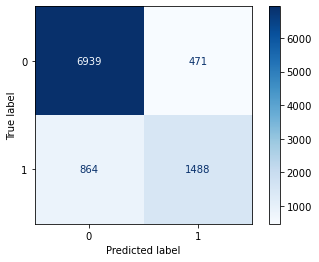

In [46]:
#plotting confusion metrics of the bagging classifier
dist_BC = plot_confusion_matrix(pipeline_BC.fit(X_train,y_train),
                                X_test,y_test,
                                cmap='Blues')

Looking at the confusion matrix its obvious that the bagging classifier performed alot better than decision tree classifier and logisticregression.The number of false negative and false positives are less than the that of logisc regression. This signifies that bagging classifier prediction the labels moree accurately than logistic regression.

In [47]:
print(classification_report(y_test,y_pred_BC))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7410
           1       0.77      0.63      0.69      2352

    accuracy                           0.86      9762
   macro avg       0.83      0.78      0.80      9762
weighted avg       0.86      0.86      0.86      9762



In [49]:
cv_scores_BC = cross_val_score(pipeline_BC,X,y,cv=10,scoring='roc_auc')
print('Accuracy score of Bagging classifier with cross validation of 10: {:.2f}%'.format(cv_scores_BC.mean()*100))

Accuracy score of Bagging classifier with cross validation of 10: 91.23%


###### Random Forest

In [50]:
# Setup the pipeline steps: steps
steps_rf = [('scaler', StandardScaler()),
         ('rf', RandomForestClassifier(max_depth=10))]

rf = RandomForestClassifier(max_depth=10)

# Create the pipeline: pipeline
pipeline_rf = Pipeline(steps_rf)

# Fit the pipeline to the training set: knn_scaled
pipeline_rf.fit(X_train,y_train)
rf.fit(X_train,y_train)

y_pred_rf = pipeline_rf.predict(X_test)
y_pred_rf_unscaled = rf.predict(X_test)

y_pred_proba_rf = pipeline_rf.predict_proba(X_test)[:,1]
y_pred_proba_rf_unscaled = rf.predict_proba(X_test)[:,1]

# Compute and print metrics
print('Accuracy score of randomforest classifier model: {:.2f}%'.format(accuracy_score(y_test,y_pred_rf)*100))
print('roc_auc_score of random forest classifier: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_rf)*100))
print('Accuracy score of randomforest classifier without scaling : {:.2f}%'.format(accuracy_score(y_test,y_pred_rf_unscaled)*100))
print('roc_auc_score of random forest classifier without scaling: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_rf_unscaled)*100))

Accuracy score of randomforest classifier model: 86.54%
roc_auc_score of random forest classifier: 92.01%
Accuracy score of randomforest classifier without scaling : 86.48%
roc_auc_score of random forest classifier without scaling: 92.10%


* compared to the bagging classifier the accuracy of the randomforest classifier model increased by 0.6% and its roc_auc score increased by 5.7%

###### Interpreting the randomforest classifier model with ELI5

In [51]:
#to clearly define class feature names based on feature importance of the random forest classifier
show_weight_rf = eli5.show_weights(pipeline_rf,feature_names = feature_names,target_names = class_names)
show_weight_rf

Weight,Feature
0.2023 ± 0.1321,education
0.1921 ± 0.2620,capital-gain
0.1618 ± 0.1159,fnlwgt
0.1310 ± 0.2716,race
0.0796 ± 0.0983,age
0.0526 ± 0.0612,marital-status
0.0483 ± 0.0418,education-num
0.0386 ± 0.0539,relationship
0.0247 ± 0.0372,sex
0.0230 ± 0.0616,hours-per-week


* education,capital-gain,fnlwgt,race,age,marital-status and education-num are the features that influences the predictions made by random forest the most

In [52]:
#Generating the confusion matrix for random forest classifier
rf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_matrix

array([[7109,  301],
       [1013, 1339]], dtype=int64)

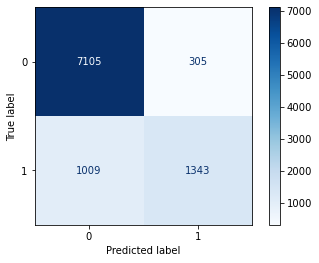

In [53]:
#plotting confusion metrics of the bagging classifier
dist_rf = plot_confusion_matrix(pipeline_rf.fit(X_train,y_train),
                                X_test,y_test,
                                cmap='Blues')

* Although the accuracy and roc_score in random forest classifier were higher than that of other models. This model predicted the class 0 more than the class 1.
This means that the model is bias in its prediction


In [54]:
cv_scores_rf = cross_val_score(rf,X,y,cv=10,scoring='roc_auc')
print(cv_scores_rf.mean())

0.9164312734411133


In [55]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7410
           1       0.82      0.57      0.67      2352

    accuracy                           0.87      9762
   macro avg       0.85      0.76      0.79      9762
weighted avg       0.86      0.87      0.86      9762



###### plotting information gain of random forest classifier

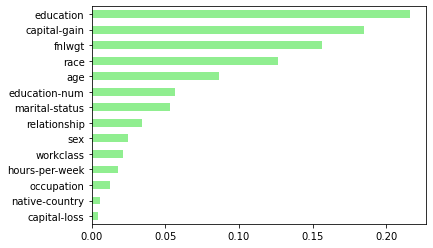

In [56]:
#create pd.series
importance_rf = pd.Series(rf.feature_importances_,index = df.columns[:14])

#sort_importance_rf
sorted_importance_rf = importance_rf.sort_values()

#make horizontal bar plot
sorted_importance_rf.plot(kind='barh',color='lightgreen')
plt.show()

###### GradientBoosting classifier

In [57]:
# Setup the pipeline steps: steps
steps_gbc = [('scaler', StandardScaler()),
         ('gbc', GradientBoostingClassifier(max_depth=2, n_estimators=180,random_state=42))]

gbc = GradientBoostingClassifier(max_depth=2, n_estimators=180,random_state=42)

# Create the pipeline: pipeline
pipeline_gbc = Pipeline(steps_gbc)

# Fit the pipeline to the training set: knn_scaled
pipeline_gbc.fit(X_train,y_train)
gbc.fit(X_train,y_train)

y_pred_gbc = pipeline_gbc.predict(X_test)
y_pred_gbc_unscaled = gbc.predict(X_test)

y_pred_proba_gbc = pipeline_gbc.predict_proba(X_test)[:,1]
y_pred_proba_gbc_unscaled = gbc.predict_proba(X_test)[:,1]

# Compute and print metrics
print('Accuracy score of gradient boosting classifier model: {:.2f}%'.format(accuracy_score(y_test,y_pred_gbc)*100))
print('roc_auc_score of gradient boosting classifier: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_gbc)*100))
print('Accuracy score of gradient boosting classifier without scaling : {:.2f}%'.format(accuracy_score(y_test,y_pred_gbc_unscaled)*100))
print('roc_auc_score of gradient boosting classifier without scaling: {:.2f}%'.format(roc_auc_score(y_test,y_pred_proba_gbc_unscaled)*100))

Accuracy score of gradient boosting classifier model: 86.85%
roc_auc_score of gradient boosting classifier: 92.42%
Accuracy score of gradient boosting classifier without scaling : 86.85%
roc_auc_score of gradient boosting classifier without scaling: 92.42%


In [58]:
cv_scores_gbc = cross_val_score(pipeline_gbc,X,y,cv=10,scoring='roc_auc')
print(cv_scores_gbc.mean())

0.919183345059475


In [59]:
gbr_matrix = confusion_matrix(y_test, y_pred_gbc)
gbr_matrix

array([[7047,  363],
       [ 921, 1431]], dtype=int64)

In [60]:
#function that predicts a class label test features and model e.g (X_test[9],KNeighborsClassifier())
def predict(a_sample,model):
    sample = np.array(a_sample).reshape(1,-1)
    prediction = model.predict(sample)
    if prediction == 0:
        print(f"This adult earns $50,000 or less in a year")
    else:
        print(f"This adult earns more than $50,000 a year")
    return prediction

In [61]:
predict(X_test[10],pipeline_lr)

This adult earns more than $50,000 a year


array([1])

### Evaluating our minority class (Class Label 1) Manually

In [62]:
df2.head(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0


In [63]:
df2[df2['salary']==1].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
7,52,209642,9,0,0,45,5,11,2,3,0,4,1,38,1
8,31,45781,14,14084,0,50,3,12,4,9,1,4,0,38,1
9,42,159449,13,5178,0,40,3,9,2,3,0,4,1,38,1
10,37,280464,10,0,0,80,3,15,2,3,0,2,1,38,1
11,30,141297,13,0,0,40,6,9,2,9,0,1,1,18,1


In [64]:
X_1 = np.array([52,209642,9,0,0,45,5,11,2,3,0,4,1,38])
X_2 = np.array([31,45781,14,14084,0,50,3,12,4,9,1,4,0,38])
X_3 = np.array([42,159449,13,5178,0,40,3,9,2,3,0,4,1,38])
X_4 = np.array([37,280464,10,0,0,80,3,15,2,3,0,2,1,38])

In [65]:
print('Logistic Regression prediction is: ', predict(X_1,pipeline_lr))
print('Random Forest classifier prediction is: ', predict(X_1,pipeline_rf))
print('KNeighbors classifier prediction is: ', predict(X_1,pipeline_knn))
print('Gradient Boosting Classifier prediction is: ', predict(X_1,pipeline_gbc))
print('Decision Tree Classifier prediction is: ', predict(X_1,pipeline_dt))
print('Bagging Classifier prediction is: ', predict(X_1,pipeline_BC))

This adult earns $50,000 or less in a year
Logistic Regression prediction is:  [0]
This adult earns $50,000 or less in a year
Random Forest classifier prediction is:  [0]
This adult earns more than $50,000 a year
KNeighbors classifier prediction is:  [1]
This adult earns $50,000 or less in a year
Gradient Boosting Classifier prediction is:  [0]
This adult earns more than $50,000 a year
Decision Tree Classifier prediction is:  [1]
This adult earns $50,000 or less in a year
Bagging Classifier prediction is:  [0]


In [66]:
print('Logistic Regression prediction is: ', predict(X_2,pipeline_lr))
print('Random Forest classifier prediction is: ', predict(X_2,pipeline_rf))
print('KNeighbors classifier prediction is: ', predict(X_2,pipeline_knn))
print('Gradient Boosting Classifier prediction is: ', predict(X_2,pipeline_gbc))
print('Decision Tree Classifier prediction is: ', predict(X_2,pipeline_dt))
print('Bagging Classifier prediction is: ', predict(X_2,pipeline_BC))

This adult earns more than $50,000 a year
Logistic Regression prediction is:  [1]
This adult earns more than $50,000 a year
Random Forest classifier prediction is:  [1]
This adult earns more than $50,000 a year
KNeighbors classifier prediction is:  [1]
This adult earns more than $50,000 a year
Gradient Boosting Classifier prediction is:  [1]
This adult earns more than $50,000 a year
Decision Tree Classifier prediction is:  [1]
This adult earns more than $50,000 a year
Bagging Classifier prediction is:  [1]


In [67]:
print('Logistic Regression prediction is: ', predict(X_3,pipeline_lr))
print('Random Forest classifier prediction is: ', predict(X_3,pipeline_rf))
print('KNeighbors classifier prediction is: ', predict(X_3,pipeline_knn))
print('Gradient Boosting Classifier prediction is: ', predict(X_3,pipeline_gbc))
print('Decision Tree Classifier prediction is: ', predict(X_3,pipeline_dt))
print('Bagging Classifier prediction is: ', predict(X_3,pipeline_BC))

This adult earns more than $50,000 a year
Logistic Regression prediction is:  [1]
This adult earns more than $50,000 a year
Random Forest classifier prediction is:  [1]
This adult earns more than $50,000 a year
KNeighbors classifier prediction is:  [1]
This adult earns more than $50,000 a year
Gradient Boosting Classifier prediction is:  [1]
This adult earns more than $50,000 a year
Decision Tree Classifier prediction is:  [1]
This adult earns more than $50,000 a year
Bagging Classifier prediction is:  [1]


In [68]:
print('Logistic Regression prediction is: ', predict(X_4,pipeline_lr))
print('Random Forest classifier prediction is: ', predict(X_4,pipeline_rf))
print('KNeighbors classifier prediction is: ', predict(X_4,pipeline_knn))
print('Gradient Boosting Classifier prediction is: ', predict(X_4,pipeline_gbc))
print('Decision Tree Classifier prediction is: ', predict(X_4,pipeline_dt))
print('Bagging Classifier prediction is: ', predict(X_4,pipeline_BC))

This adult earns $50,000 or less in a year
Logistic Regression prediction is:  [0]
This adult earns more than $50,000 a year
Random Forest classifier prediction is:  [1]
This adult earns more than $50,000 a year
KNeighbors classifier prediction is:  [1]
This adult earns more than $50,000 a year
Gradient Boosting Classifier prediction is:  [1]
This adult earns more than $50,000 a year
Decision Tree Classifier prediction is:  [1]
This adult earns more than $50,000 a year
Bagging Classifier prediction is:  [1]


Narration: 

Decision tree classifier,Bagging classifier and kneighbor classifier classified the minority class 1,consistently compared to logistic regression,random forest classifier and gradientboosting classifier.

### Visualizing our models performance

In [86]:
Models_dict = {'Model':['Logistic regression',
                        'Random Forest classifier',
                        'KNeighbors classifier',
                        'Gradient Boosting Classifier',
                        'Decision Tree Classifier',
                        'Bagging Classifier'],
            'Accuracy_Score':[accuracy_score(y_test,y_pred_lr)*100,
                              accuracy_score(y_test,y_pred_rf)*100,
                              accuracy_score(y_test,y_pred_knn)*100,
                              accuracy_score(y_test,y_pred_dt)*100,
                              accuracy_score(y_test,y_pred_gbc)*100,
                              accuracy_score(y_test,y_pred_BC)*100],
             'Roc_Auc_Score':[roc_auc_score(y_test,y_pred_proba_lr)*100,
                             roc_auc_score(y_test,y_pred_proba_rf)*100,
                             roc_auc_score(y_test,y_pred_proba_knn)*100,
                             roc_auc_score(y_test,y_pred_proba_gbc)*100,
                             roc_auc_score(y_test,y_pred_proba_dt)*100,
                             roc_auc_score(y_test,y_pred_proba_BC)*100]}

Models_df = pd.DataFrame(Models_dict)
Models_df

,Model,Accuracy_Score,Roc_Auc_Score
0,Logistic regression,82.657242,85.771606
1,Random Forest classifier,86.539644,92.013424
2,KNeighbors classifier,83.261627,85.554830
3,Gradient Boosting Classifier,85.545995,92.424284
4,Decision Tree Classifier,86.846958,90.184737
5,Bagging Classifier,86.426962,91.607037


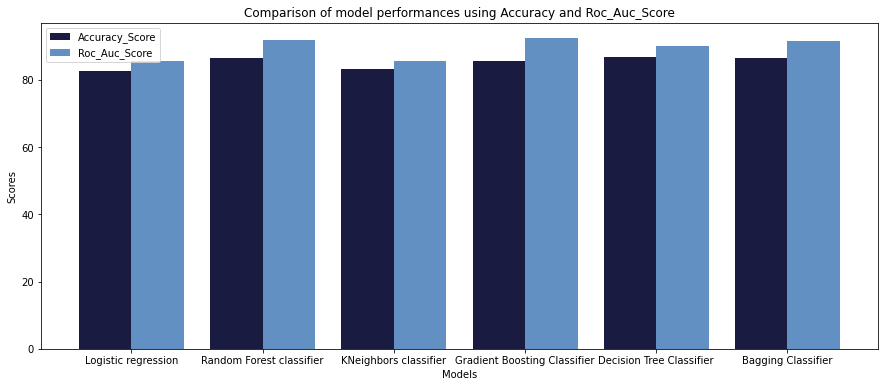

In [87]:
plt.figure(figsize=(15,6))

X_axis = np.arange(len(Models_df['Model']))
plt.bar(X_axis - 0.2,Models_df['Accuracy_Score'],0.4,label='Accuracy_Score',color ='#1A1B41')
plt.bar(X_axis + 0.2,Models_df['Roc_Auc_Score'],0.4,label='Roc_Auc_Score',color='#6290C3')
plt.xticks(X_axis,Models_df['Model'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.title('Comparison of model performances using Accuracy and Roc_Auc_Score')
plt.show()

##### saving our models(serialization)

In [88]:
import joblib

In [89]:
salary_prediction_lr_model = open('salary_predictions_LogisticRegression_model.pkl','wb')
joblib.dump(pipeline_lr,salary_prediction_lr_model)
salary_prediction_lr_model.close()

In [90]:
salary_prediction_knn_model = open('salary_predictions_KNeighborsClassifier_model.pkl','wb')
joblib.dump(pipeline_knn,salary_prediction_knn_model)
salary_prediction_knn_model.close()

In [91]:
salary_prediction_rf_model = open('salary_predictions_RandomForestClassifier_model.pkl','wb')
joblib.dump(pipeline_rf,salary_prediction_rf_model)
salary_prediction_rf_model.close()

In [92]:
salary_prediction_gbc_model = open('salary_predictions_GradientBoostingClassifier_model.pkl','wb')
joblib.dump(pipeline_gbc,salary_prediction_gbc_model)
salary_prediction_gbc_model.close()

In [120]:
salary_prediction_BC_model = open('salary_predictions_BaggingClassifier_model.pkl','wb')
joblib.dump(pipeline_BC,salary_prediction_BC_model)
salary_prediction_BC_model.close()

In [121]:
salary_prediction_dt_model = open('salary_predictions_DecisionTreeClassifier_model.pkl','wb')
joblib.dump(pipeline_dt,salary_prediction_dt_model)
salary_prediction_dt_model.close()

### CONCLUSION

- 1. Decision tree classifier classifed the class labels better than the other models. It was better able to generalize in its prediction compared to other models.
- 2.Bagging classifier alhough has a hight roc-score,decison trees is better able to generalize in its prediction compared to the other models
- 3. logistic regression was the worst model comapred to other models and was heavily bais towards the majority class.
- 4. random forest classifier gave a high auc_roc score but looking at the confusion matrix,the number of false poitive snad false negative values were very high and its precision and recall were 81%,57% for the minority class(Adults earning above 50,000dollars)respectively. its recall score for the minority class is 12% less than that of the bagging classifier despite its roc_auc_score being higher.

### RECOMMENDATION

- Adding more minority class label data could potentially help our model generalize better on unseen data.
- Hyperparameter tunning of our models could probably improve their performances.

In [122]:
df2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4,0


In [123]:
df2.to_csv('cleaned_salary_prediction_dataset_numeric.csv')

In [124]:
df2.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4,0


In [125]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [126]:
#get values of each encoded value
le = LabelEncoder()
le.fit(df['education'])
le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print(le_name_mapping)

{' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}


###### FUNCTION TO UNENCODE AND MAP THE VALUES OF THE ENCODED FEATURE VALUE

In [127]:
column = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']


def reverse_encode(column):
        le = LabelEncoder()
        le.fit(df[column])
        le_name_mapping = dict(zip(le.classes_ , le.transform(le.classes_)))
        print(le_name_mapping)

In [128]:
reverse_encode('workclass')

{' Federal-gov': 0, ' Local-gov': 1, ' Never-worked': 2, ' Private': 3, ' Self-emp-inc': 4, ' Self-emp-not-inc': 5, ' State-gov': 6, ' Without-pay': 7}


In [129]:
reverse_encode('marital-status')

{' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}


In [130]:
reverse_encode('occupation')

{' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}


In [131]:
reverse_encode('relationship')

{' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}


In [132]:
reverse_encode('race')

{' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}


In [133]:
reverse_encode('sex')

{' Female': 0, ' Male': 1}


In [134]:
reverse_encode('native-country')

{' Cambodia': 0, ' Canada': 1, ' China': 2, ' Columbia': 3, ' Cuba': 4, ' Dominican-Republic': 5, ' Ecuador': 6, ' El-Salvador': 7, ' England': 8, ' France': 9, ' Germany': 10, ' Greece': 11, ' Guatemala': 12, ' Haiti': 13, ' Holand-Netherlands': 14, ' Honduras': 15, ' Hong': 16, ' Hungary': 17, ' India': 18, ' Iran': 19, ' Ireland': 20, ' Italy': 21, ' Jamaica': 22, ' Japan': 23, ' Laos': 24, ' Mexico': 25, ' Nicaragua': 26, ' Outlying-US(Guam-USVI-etc)': 27, ' Peru': 28, ' Philippines': 29, ' Poland': 30, ' Portugal': 31, ' Puerto-Rico': 32, ' Scotland': 33, ' South': 34, ' Taiwan': 35, ' Thailand': 36, ' Trinadad&Tobago': 37, ' United-States': 38, ' Vietnam': 39, ' Yugoslavia': 40}


In [135]:
reverse_encode('salary')

{' <=50K': 0, ' >50K': 1}
